# COURSE: PCA and multivariate neural signal processing
## SECTION: Source separation with GED
### VIDEO: GED in a simple example
#### Instructor: sincxpress.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: numpy does not solve the GED, so we use scipy
import scipy.linalg

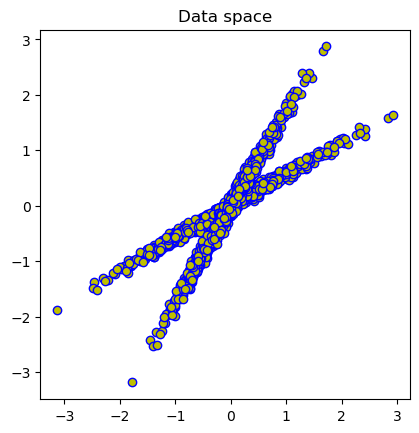

In [3]:
# generate data
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrix
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ])

# rotate data
y = np.vstack( (x@R1,x@R2) )


# show the data
plt.plot(y[:,0],y[:,1],'bo',markerfacecolor='y')
plt.axis('square')
plt.title('Data space')
plt.show()

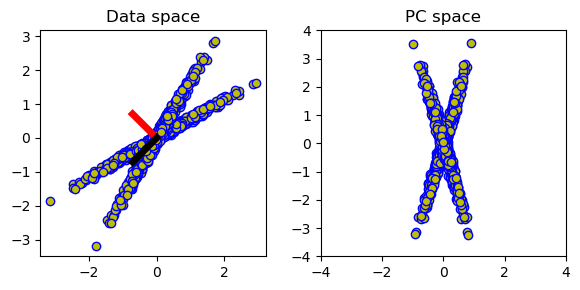

In [4]:
## run PCA

# mean-center
y -= np.mean(y,axis=0)

# eigendecomposition of covariance matrix
evalsPCA,evecsPCA = np.linalg.eig( y.T@y / len(y) )

# component time series
comps = evecsPCA.T@y.T


# plot the data with eigenvectors
_,axs = plt.subplots(1,2,figsize=(6,3))
axs[0].plot(y[:,0],y[:,1],'bo',markerfacecolor='y')
axs[0].plot([0,evecsPCA[0,0]],[0,evecsPCA[1,0]],'r',linewidth=5)
axs[0].plot([0,evecsPCA[0,1]],[0,evecsPCA[1,1]],'k',linewidth=5)
axs[0].axis('square')
axs[0].set_title('Data space')


## plot the data in PC space
axs[1].plot(comps[0,:],comps[1,:],'bo',markerfacecolor='y')
axs[1].set_xlim([-4,4])
axs[1].set_ylim([-4,4])
axs[1].set_title('PC space')

plt.tight_layout()
plt.show()

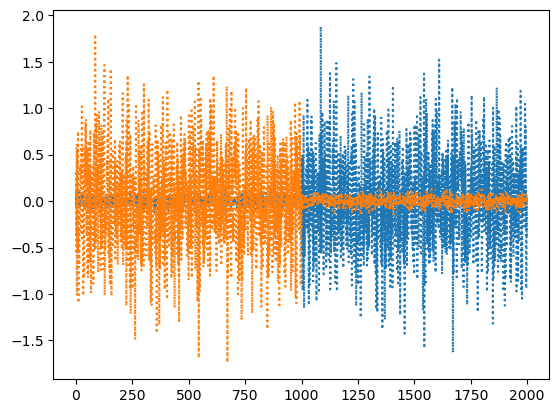

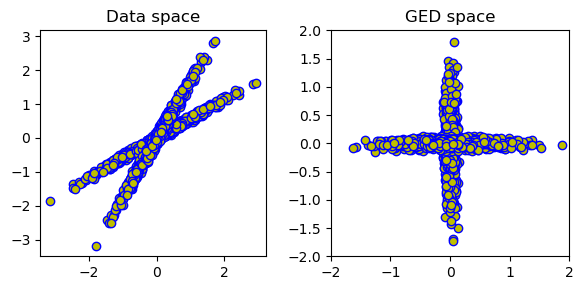

In [6]:
## GED

# covariance matrices
S = np.cov(y[:1000,:].T)
R = np.cov(y[1000:,:].T)

# GED with optional scaling
### try without the normalization!
D,evecsGED = scipy.linalg.eigh(S,R)
evecsGED /= np.sqrt(np.sum(evecsGED**2,axis=0))

# component time series
comps = evecsGED.T@y.T


plt.plot(comps.T,':')
plt.show()

# plot the data with eigenvectors
_,axs = plt.subplots(1,2,figsize=(6,3))
axs[0].plot(y[:,0],y[:,1],'bo',markerfacecolor='y')
axs[0].axis('square')
axs[0].set_title('Data space')


## plot the data in PC space
axs[1].plot(comps[0,:],comps[1,:],'bo',markerfacecolor='y')
axs[1].set_xlim([-2,2])
axs[1].set_ylim([-2,2])
axs[1].set_title('GED space')

plt.tight_layout()
plt.show()